In [309]:
import numpy as np
import pandas as pd

In [310]:
df = pd.read_csv('spam.csv')

In [311]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
4253,ham,"How about clothes, jewelry, and trips?",NaN,NaN,NaN
3617,ham,Hey check it da. I have listed da.,NaN,NaN,NaN
3635,ham,\ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOU...,NaN,NaN,NaN
5549,ham,"You know, wot people wear. T shirts, jumpers, ...",NaN,NaN,NaN


In [312]:
df.shape

(5572, 5)

In [313]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [316]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [317]:
df.sample(5)

,v1,v2
4413,ham,How stupid to say that i challenge god.You don...
631,ham,Thank u!
17,ham,Eh u remember how 2 spell his name... Yes i di...
2855,ham,"Japanese Proverb: If one Can do it, U too Can ..."
3061,ham,Fine. Do you remember me.


In [318]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5094,ham,"Hi Shanil,Rakhesh here.thanks,i have exchanged..."
4799,ham,its cool but tyler had to take off so we're go...
2106,ham,Thank you. I like you as well...
3683,ham,Dad says hurry the hell up
436,ham,"Ask g or iouri, I've told the story like ten t..."


In [319]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [320]:
df['target'] = encoder.fit_transform(df['target'])

In [321]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [322]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [323]:
# check for duplicate values
df.duplicated().sum()

409

In [324]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [325]:
df.duplicated().sum()

0

In [326]:
df.shape

(5163, 2)

## 2.EDA

In [328]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [329]:
df['target'].value_counts()

target
0    4516
1     647
Name: count, dtype: int64

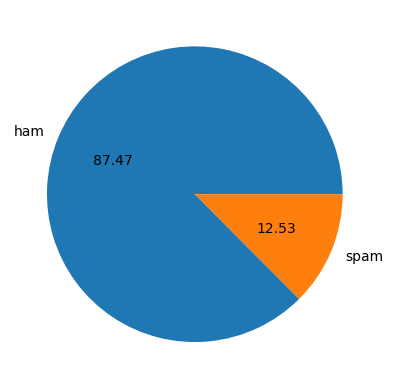

In [330]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [331]:
# Data is imbalanced

In [332]:
import nltk

In [333]:
!pip install nltk

In [334]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\NIHAL
[nltk_data]     SUTAR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [335]:
df['num_characters'] = df['text'].apply(len)

In [336]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [337]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [338]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [339]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [340]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [341]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.444122,1.963974
std,58.153491,13.327940,1.448008
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [342]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.123782,1.820195
std,56.356310,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [343]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,27.659969,2.967543
std,30.096861,7.038065,1.490069
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [344]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

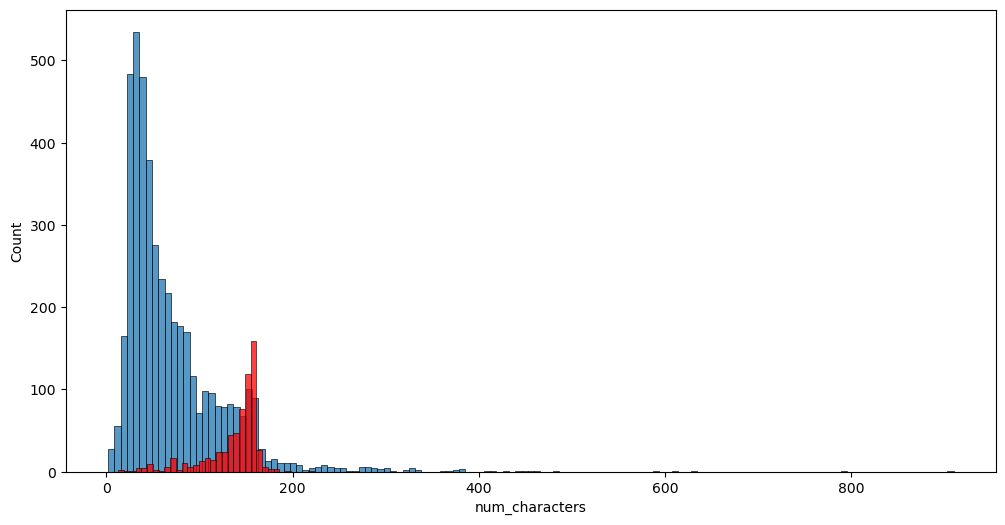

In [345]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

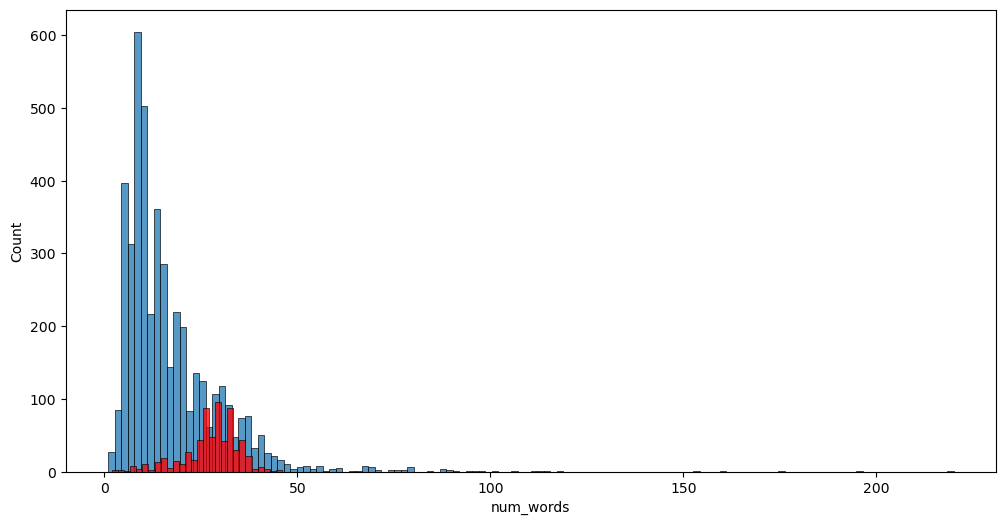

In [346]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

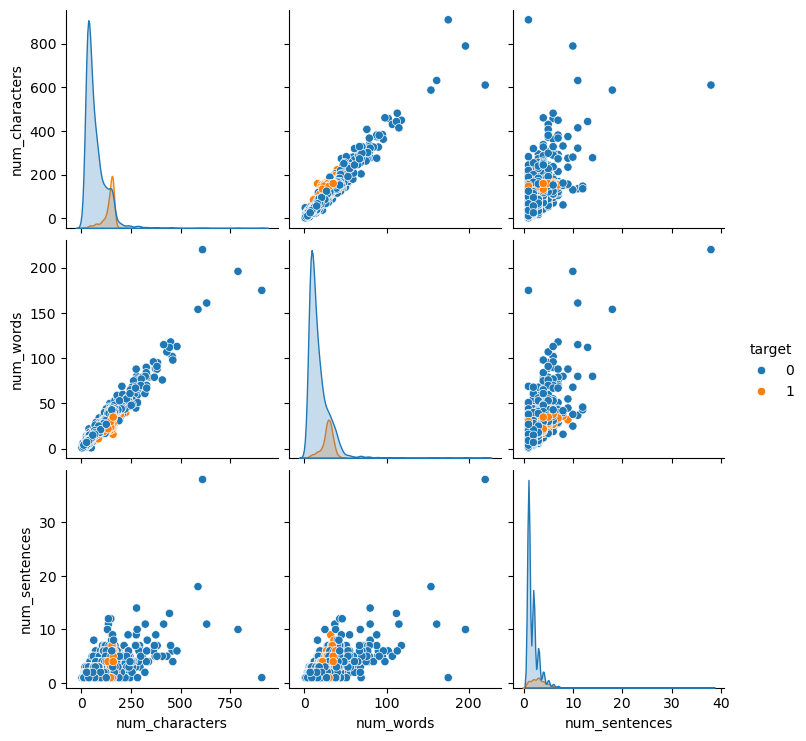

In [347]:
sns.pairplot(df,hue='target')

In [410]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'